In [4]:
import h5py
import numpy as np
import pandas as pd


In [5]:

# Open the .h5 file and list the datasets
with h5py.File('train/train.h5', 'r') as file:
    dataset_names_train = list(file.keys())
    print("Available datasets train:", dataset_names_train)

with h5py.File('test/test.h5', 'r') as file:
    dataset_names_test = list(file.keys())
    print("Available datasets test:", dataset_names_test)

# Load the EEG dataset from 'train.h5'
with h5py.File('train/train.h5', 'r') as file:
    eeg_data = file['x'][:]  # EEG time series data
    data = np.reshape(eeg_data[:], (eeg_data.shape[0], -1))
    df = pd.DataFrame(data)
    labels = file['y'][:]    # Labels (alcoholic or control)
    data2 = np.reshape(labels[:], (labels.shape[0], -1))
    df2 = pd.DataFrame(data2)


# Check the shapes of the loaded data
print("EEG Data Shape:", eeg_data.shape)  # Expected: (n_samples, 64, 256)
print("Labels Shape:", labels.shape)      # Expected: (n_samples,)
#204 personas, 18530 eeg signal (puntos de datos x sujeto)

#muestras (puntos de datos)
print(df.head())
print('---------------------------')
print(df2.head())
print('---------------------------')
print(df.info())
print('---------------------------')

Available datasets train: ['x', 'y']
Available datasets test: ['x']
EEG Data Shape: (204, 1, 18530)
Labels Shape: (204,)
      0         1         2         3         4         5         6      \
0 -0.005859 -0.011414 -0.010773 -0.010559 -0.008850 -0.008636 -0.009094   
1  0.002380  0.005127  0.005737  0.007263  0.008575  0.010742  0.012970   
2  0.058075  0.122040  0.108307  0.113769  0.105316  0.103912  0.094849   
3 -0.007385 -0.011932 -0.004700 -0.003143  0.005493  0.006744  0.012085   
4 -0.000458 -0.001099  0.003723  0.002930  0.004059  0.003906  0.003265   

      7         8         9      ...     18520     18521     18522     18523  \
0 -0.008850 -0.009369 -0.009888  ...  0.012573  0.007721  0.002075 -0.003174   
1  0.017212  0.022003  0.027954  ...  0.003815  0.005707  0.006683  0.006012   
2  0.091187  0.080170  0.074432  ... -0.009613 -0.008301 -0.005402 -0.007690   
3  0.012909  0.018097  0.021606  ... -0.003082 -0.007050 -0.010956 -0.013916   
4  0.002777  0.000488 -0.001

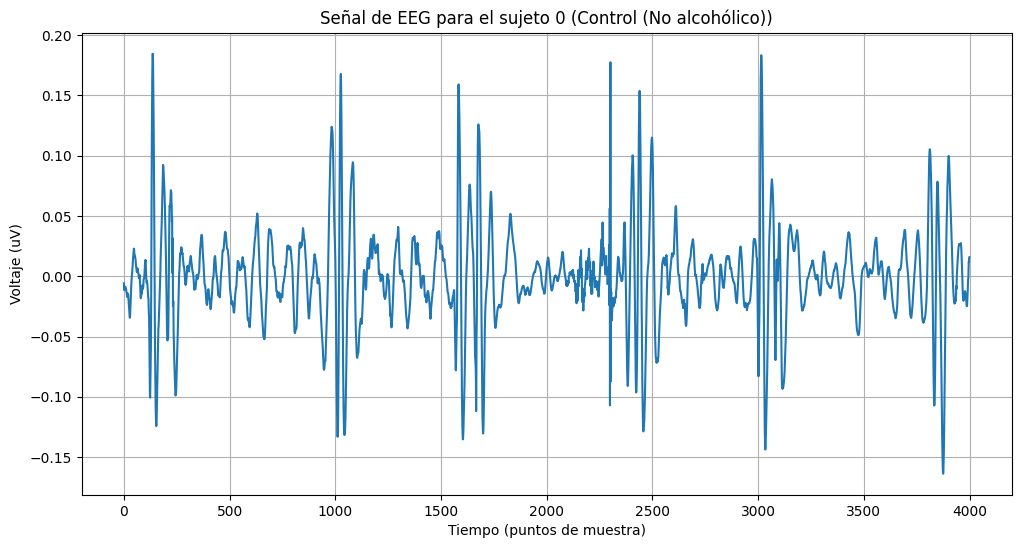

Sujeto 0: Control (No alcohólico)


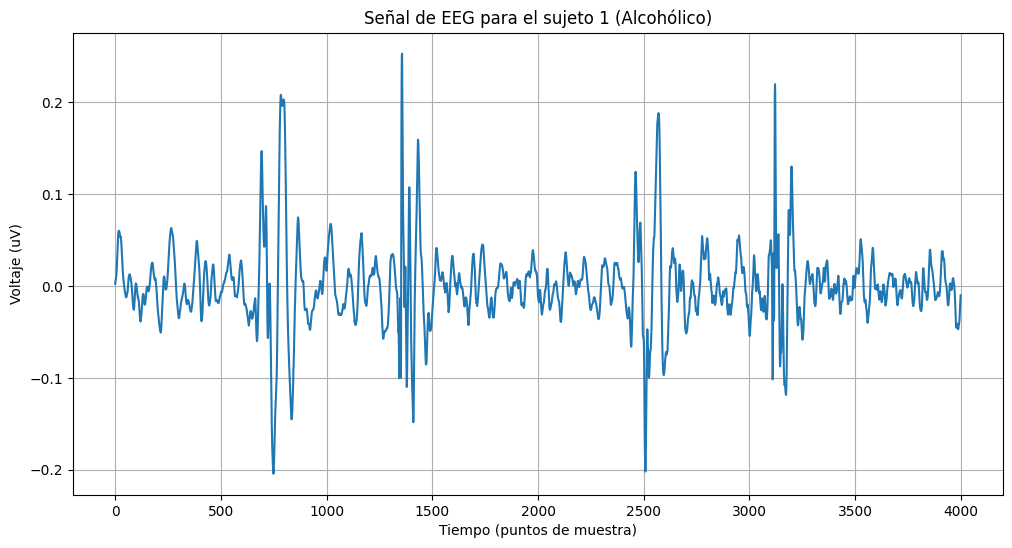

Sujeto 1: Alcohólico


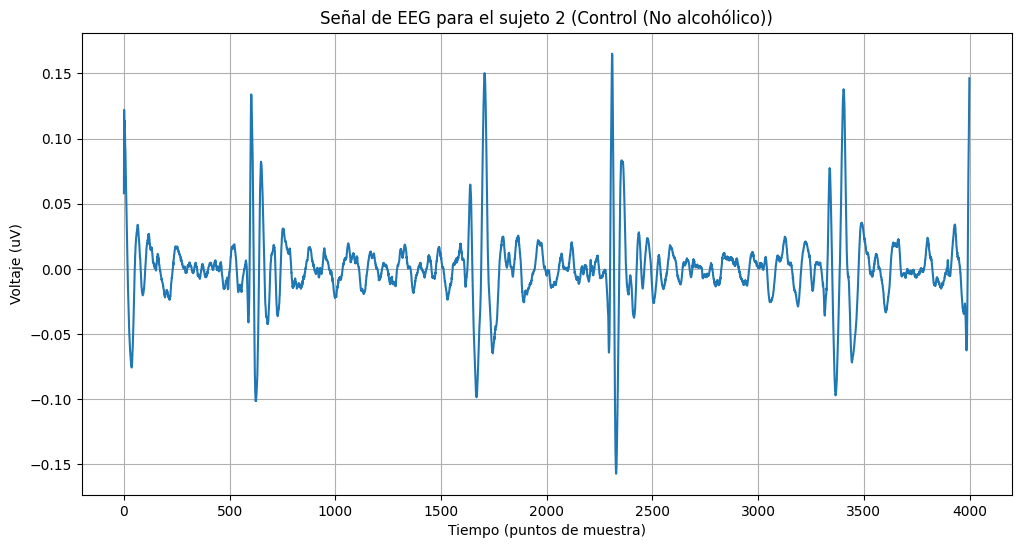

Sujeto 2: Control (No alcohólico)


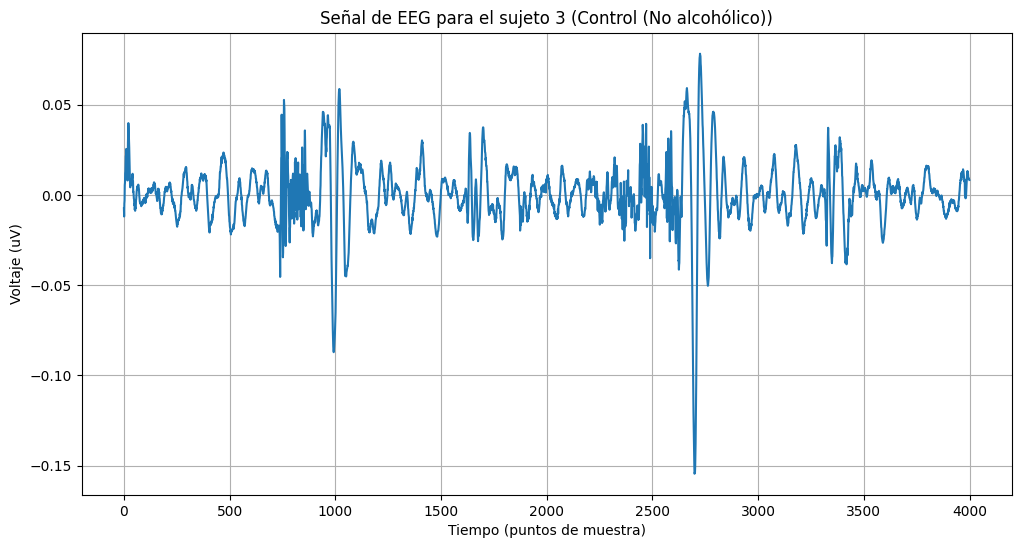

Sujeto 3: Control (No alcohólico)


In [8]:
import matplotlib.pyplot as plt

# Graficar las señales de EEG para los sujetos del 1 al 4
for subject_idx in range(4):
    subject_data = eeg_data[subject_idx, 0, :4000]  # Obtener la señal del sujeto
    subject_label = labels[subject_idx]  # Obtener la etiqueta del sujeto
    
    # Determinar si el sujeto es alcohólico o no
    label_text = 'Alcohólico' if subject_label == 1 else 'Control (No alcohólico)'

    # Graficar la señal de EEG de este sujeto
    plt.figure(figsize=(12, 6))
    plt.plot(subject_data)
    plt.title(f'Señal de EEG para el sujeto {subject_idx} ({label_text})')
    plt.xlabel('Tiempo (puntos de muestra)')
    plt.ylabel('Voltaje (uV)')
    plt.grid(True)
    plt.show()

    # Imprimir el label del sujeto
    print(f'Sujeto {subject_idx}: {label_text}')


In [14]:
import h5py
import numpy as np
import pandas as pd
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
import seaborn as sns
import matplotlib.pyplot as plt

# Load the EEG dataset
with h5py.File('train/train.h5', 'r') as file:
    eeg_data = file['x'][:]  # EEG time series data
    labels = file['y'][:]     # Labels (alcoholic or control)

n_points = eeg_data.shape[2]
subject_data = eeg_data[:, 0, :n_points]  # Obtener la señal de EEG de todos los sujetos

# Convertir los datos EEG y las etiquetas a un DataFrame
time_series_data = pd.DataFrame({
    'id': np.repeat(np.arange(subject_data.shape[0]), n_points),  # 204 sujetos
    'time': np.tile(np.arange(n_points), subject_data.shape[0]),  # Tiempo para cada punto de muestra
    'value': subject_data.flatten()  # Valores de EEG
})

# Extraer características
#extracted_features = extract_features(time_series_data, column_id='id', column_sort='time',n_jobs=3, default_fc_parameters=EfficientFCParameters())
#MinimalFCParameters()
#extracted_features.head()


ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

hola

In [15]:
import numpy as np

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


In [18]:
import h5py
import numpy as np
from pyts.transformation import WEASEL
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

with h5py.File('train/train.h5', 'r') as file:
    X_train = file['x'][:]
    y_train = file['y'][:]

# reshape para la transformación WEASEL
X_train = X_train.reshape(X_train.shape[0], -1)

#WEASEL para la extracción de características
weasel = WEASEL(word_size=4, window_sizes=np.arange(10, 50))
X_train_weasel = weasel.fit_transform(X_train, y_train)

# train 70 30
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_weasel, y_train, test_size=0.2, random_state=42)

# instanciar y entrenar
model = LogisticRegressionGD(learning_rate=0.01, n_iters=1000)
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_val_split)

accuracy = accuracy_score(y_val_split, y_pred)
f1 = f1_score(y_val_split, y_pred, average='weighted')

print(f"Precisión en el conjunto de validación: {accuracy}")
print(f"F1-Score en el conjunto de validación: {f1}")


ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [ ]:
from sklearn.model_selection import GridSearchCV

with h5py.File('test/test.h5', 'r') as file:
    X_test = file['x'][:]
    y_test = file['y'][:]

# reshape d los datos para WEASEL
X_test = X_test.reshape(X_test.shape[0], -1)

#  WEASEL en los datos de prueba
X_test_weasel = weasel.transform(X_test)

# clase adaptada para GridSearch (LogisticRegressionGD)
class LogisticRegressionGDEstimator:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.model = LogisticRegressionGD(learning_rate, n_iters)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

# ver espacio de parámetros a explorar
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_iters': [1000, 2000, 5000]
}

# GridSearch para optimización
grid_search = GridSearchCV(LogisticRegressionGDEstimator(), param_grid, scoring='f1_weighted', cv=3, n_jobs=-1)
grid_search.fit(X_train_weasel, y_train)

print(f"Mejores Parámetros: {grid_search.best_params_}")

# probar el modelo optimizado en el conjunto de test
y_pred_optimized = grid_search.predict(X_test_weasel)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')

print(f"Precisión Optimizada en el conjunto de prueba: {accuracy_optimized}")
print(f"F1-Score Optimizado: {f1_optimized}")
